# **How price of the stock changed overtime**



In [41]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
%cd '/content/drive/MyDrive/PYTHON 18/final'
!ls

/content/drive/MyDrive/PYTHON 18/final
'data analysis + prediction.ipynb'   HistoricalQuotes.csv   presentation.pptx


In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [44]:
data = pd.read_csv('HistoricalQuotes.csv')
data = data[::-1].reset_index(drop=True)
data.columns.values[1] = 'Close'
print(data)

            Date      Close     Volume       Open       High        Low
0     03/01/2010   $29.8557  137312041   $29.3928   $29.9286     $29.35
1     03/02/2010   $29.8357  141486282     $29.99   $30.1186   $29.6771
2     03/03/2010   $29.9043   92846488   $29.8486   $29.9814   $29.7057
3     03/04/2010   $30.1014   89591907   $29.8971   $30.1314   $29.8043
4     03/05/2010   $31.2786  224647427   $30.7057   $31.3857   $30.6614
...          ...        ...        ...        ...        ...        ...
2513  02/24/2020    $298.18   55548830    $297.26    $304.18    $289.23
2514  02/25/2020    $288.08   57668360    $300.95    $302.53    $286.13
2515  02/26/2020    $292.65   49678430    $286.53    $297.88     $286.5
2516  02/27/2020    $273.52   80151380     $281.1       $286    $272.96
2517  02/28/2020    $273.36  106721200    $257.26    $278.41    $256.37

[2518 rows x 6 columns]


In [45]:
data.dtypes

Date       object
Close      object
 Volume     int64
 Open      object
 High      object
 Low       object
dtype: object

In [46]:
data[data.columns[1:2]] = data[data.columns[1:2]].replace('[\$,]', '', regex=True).astype(float)
data[data.columns[3:]] = data[data.columns[3:]].replace('[\$,]', '', regex=True).astype(float)
data.dtypes

Date        object
Close      float64
 Volume      int64
 Open      float64
 High      float64
 Low       float64
dtype: object

In [47]:
#data.drop(data.columns[[0]], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2518 entries, 0 to 2517
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2518 non-null   object 
 1   Close    2518 non-null   float64
 2    Volume  2518 non-null   int64  
 3    Open    2518 non-null   float64
 4    High    2518 non-null   float64
 5    Low     2518 non-null   float64
dtypes: float64(4), int64(1), object(1)
memory usage: 118.2+ KB


In [48]:
data.describe()

,Close,Volume,Open,High,Low
count,2518.000000,2.518000e+03,2518.000000,2518.000000,2518.000000
mean,114.769522,7.258009e+07,114.728443,115.766415,113.690582
std,60.662405,5.663113e+07,60.546893,61.134456,60.085105
min,29.835700,1.136205e+07,29.392800,29.928600,28.464300
25%,66.822475,3.053026e+07,66.877150,67.475300,66.372950
50%,101.090000,5.295469e+07,101.115000,102.085000,100.350000
75%,154.630000,9.861006e+07,154.610000,155.735000,153.325000
max,327.200000,4.624423e+08,324.740000,327.850000,323.350000


In [49]:
data['Date'] = pd.to_datetime(data['Date'])

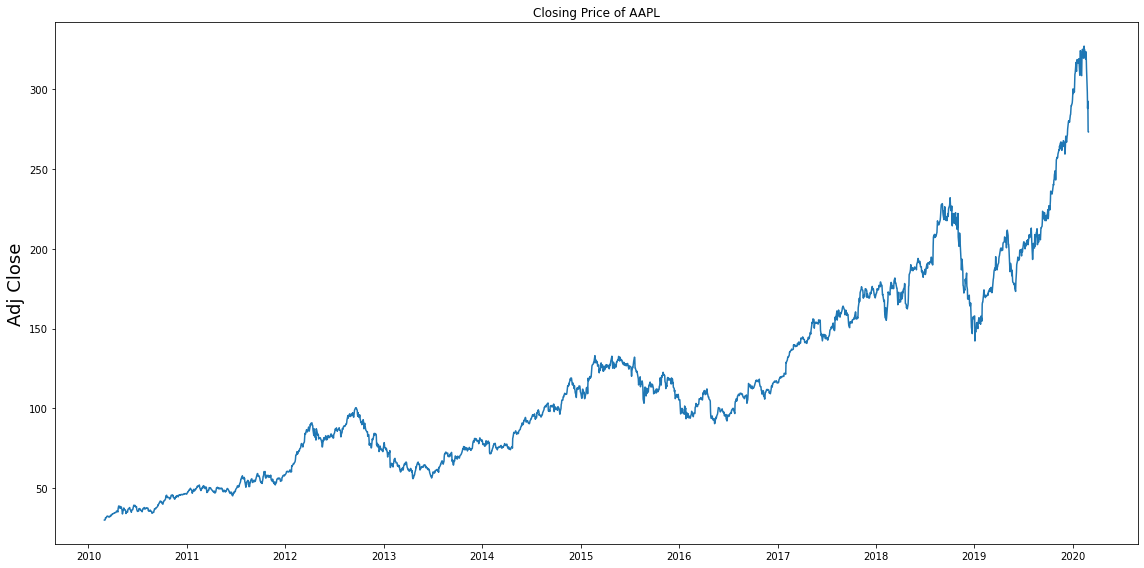

In [50]:
#Let's see a historical view of the closing price
plt.figure(figsize=(16, 8))

plt.plot(data['Date'], data['Close'])
plt.xlabel(None, fontsize=18)
plt.ylabel('Adj Close', fontsize=18)
plt.title('Closing Price of AAPL')
plt.tight_layout()
plt.show()

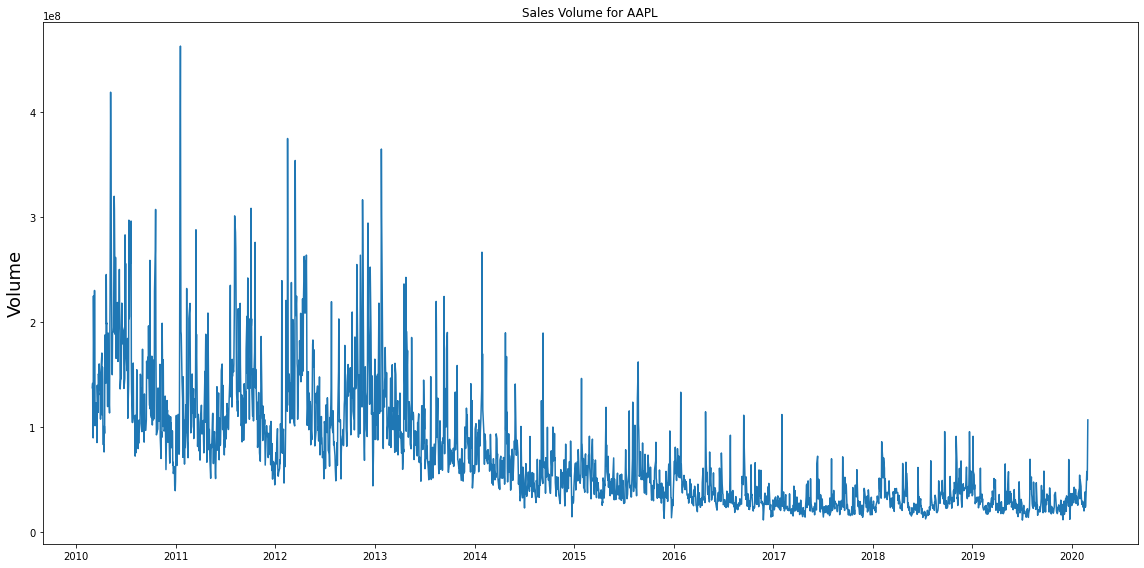

In [51]:
# Let's plot the total volume of stock being trade each day
plt.figure(figsize=(16, 8))

plt.plot(data['Date'], data[' Volume'])
plt.xlabel(None, fontsize=18)
plt.ylabel('Volume', fontsize=18)
plt.title('Sales Volume for AAPL')
plt.tight_layout()
plt.show()

# **The moving average of the various stocks**

In [52]:
def SMA(X,step):
  y = X.copy()
  for i in range(step,len(X)):
    y[i] = sum(X[i-step:i])/step
  return y
data['SMA_10'] = SMA(data.Close,10)
data['SMA_20'] = SMA(data.Close,20)
data['SMA_50'] = SMA(data.Close,50)

In [53]:
data

,Date,Close,Volume,Open,High,Low,SMA_10,SMA_20,SMA_50
0,2010-03-01,29.8557,137312041,29.3928,29.9286,29.3500,29.8557,29.8557,29.8557
1,2010-03-02,29.8357,141486282,29.9900,30.1186,29.6771,29.8357,29.8357,29.8357
2,2010-03-03,29.9043,92846488,29.8486,29.9814,29.7057,29.9043,29.9043,29.9043
3,2010-03-04,30.1014,89591907,29.8971,30.1314,29.8043,30.1014,30.1014,30.1014
4,2010-03-05,31.2786,224647427,30.7057,31.3857,30.6614,31.2786,31.2786,31.2786
...,...,...,...,...,...,...,...,...,...
2513,2020-02-24,298.1800,55548830,297.2600,304.1800,289.2300,321.4180,319.5510,305.1414
2514,2020-02-25,288.0800,57668360,300.9500,302.5300,286.1300,319.2330,318.5445,305.7354
2515,2020-02-26,292.6500,49678430,286.5300,297.8800,286.5000,315.8860,317.5010,306.0816
2516,2020-02-27,273.5200,80151380,281.1000,286.0000,272.9600,313.1900,316.2490,306.5054


In [54]:
#data[['Close', 'SMA_10', 'SMA_20', 'SMA_50']].plot()

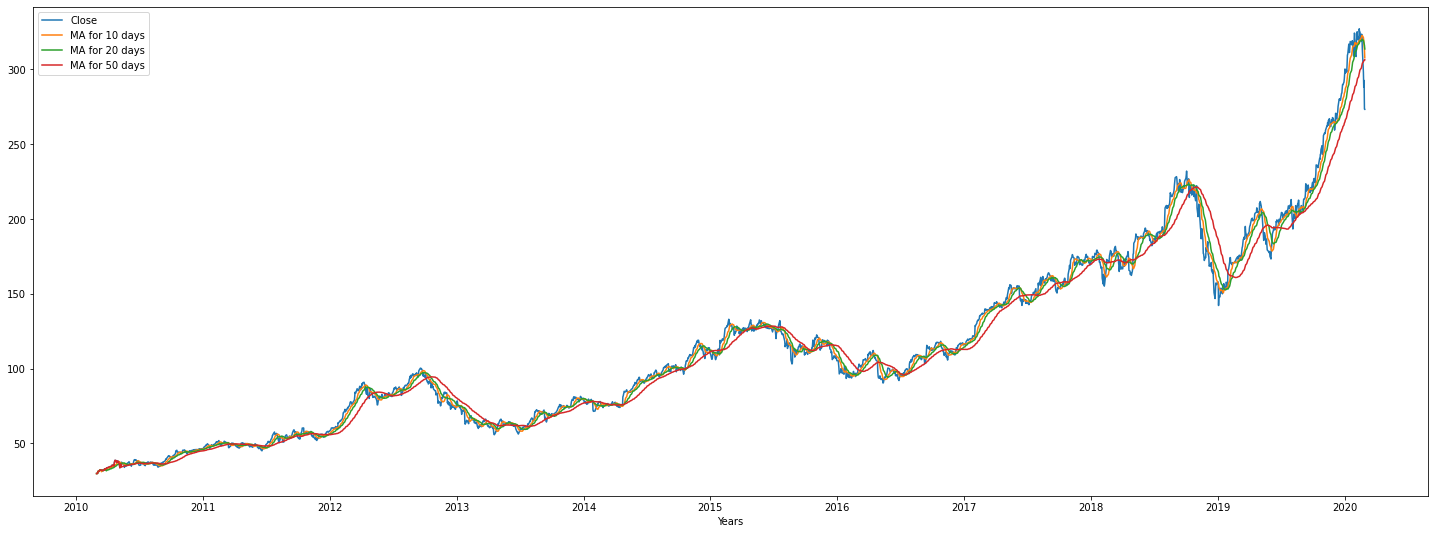

In [55]:
plt.figure(figsize=(25,9))
plt.plot(data['Date'], data['Close'], label='Close')
plt.plot(data['Date'], data['SMA_10'], label='MA for 10 days')
plt.plot(data['Date'], data['SMA_20'], label='MA for 20 days')
plt.plot(data['Date'], data['SMA_50'], label='MA for 50 days')
plt.xlabel('Years')
plt.ylabel(None)
plt.legend()
plt.show()

# **Visualize data**

In [56]:
data_1 = data[data.columns[1:]]

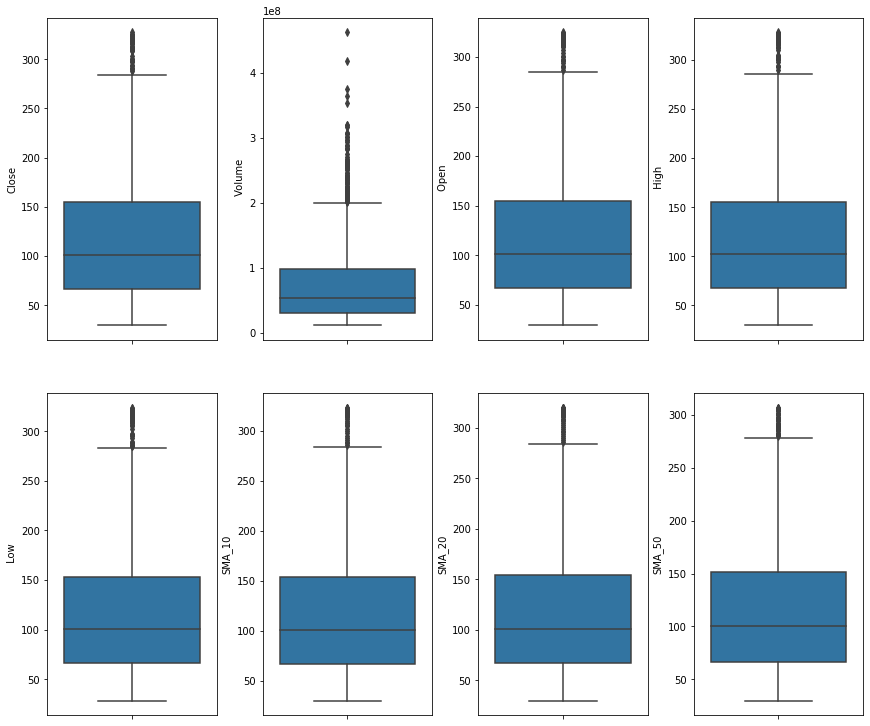

In [57]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(12, 10))
index = 0
axs = axs.flatten()
for k,v in data_1.items():
    sns.boxplot(y=k, data=data, ax=axs[index])
    index += 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [58]:
for k, v in data_1.items():
  q1 = v.quantile(0.25)
  q3 = v.quantile(0.75)
  irq = q3 - q1
  v_col = v[(v <= q1 - 1.5 * irq) | (v >= q3 + 1.5 * irq)]
  perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
  print("Column %s outliers = %.2f%%" % (k, perc)) 

Column Close outliers = 1.67%
Column  Volume outliers = 3.81%
Column  Open outliers = 1.63%
Column  High outliers = 1.67%
Column  Low outliers = 1.67%
Column SMA_10 outliers = 1.59%
Column SMA_20 outliers = 1.39%
Column SMA_50 outliers = 1.11%


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

[]

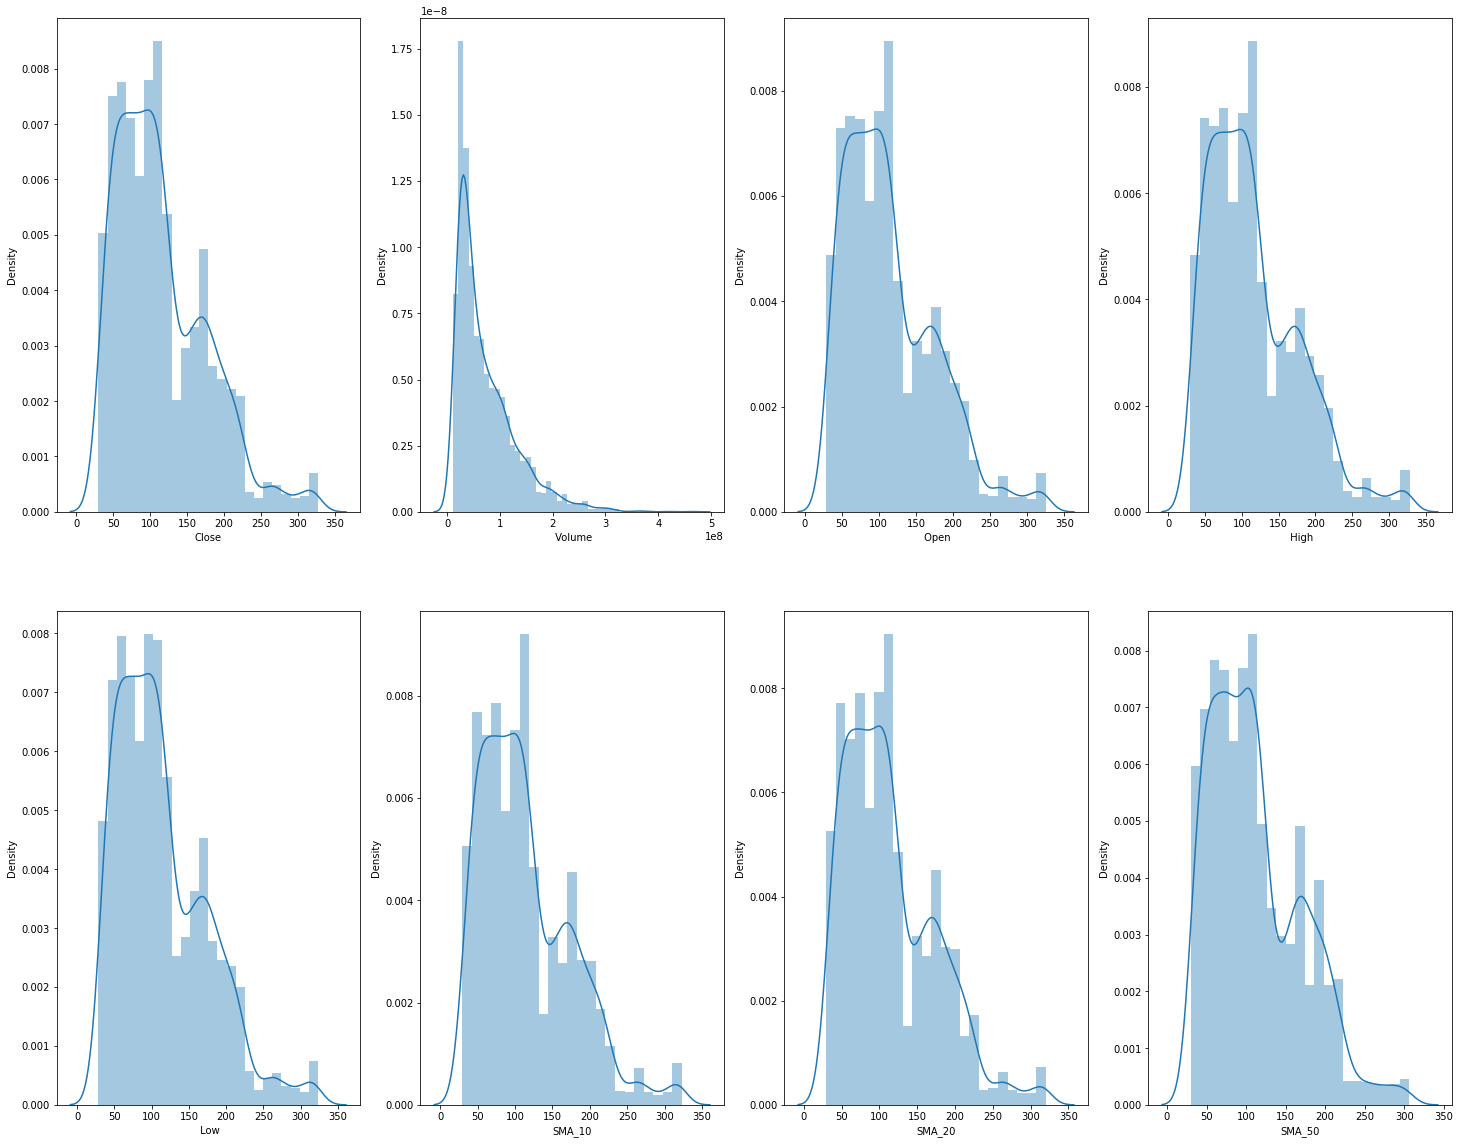

In [59]:
fig, axs = plt.subplots(ncols=4, nrows=2, figsize=(25, 20))
index = 0
axs = axs.flatten()
for k,v in data_1.items():
    sns.distplot(v, ax=axs[index])
    index += 1
plt.plot()

--> *Observation:* The feature **volume** has a lot of outliers which makes the graph of it skews significantly to the right

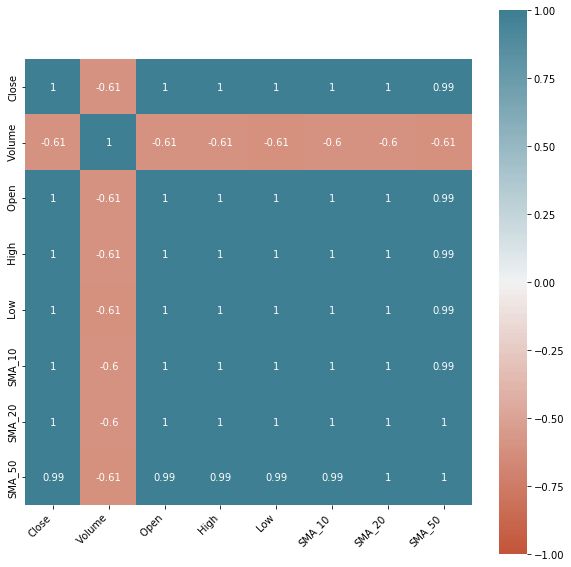

In [60]:
#correlation
cor = data_1.corr(method='pearson')
fig, ax = plt.subplots(figsize=(10,10))      
sns.heatmap(
    cor, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    ax=ax,
    annot=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

# **The daily return of the stock on average**

Text(0.5, 1.0, 'APPLE')

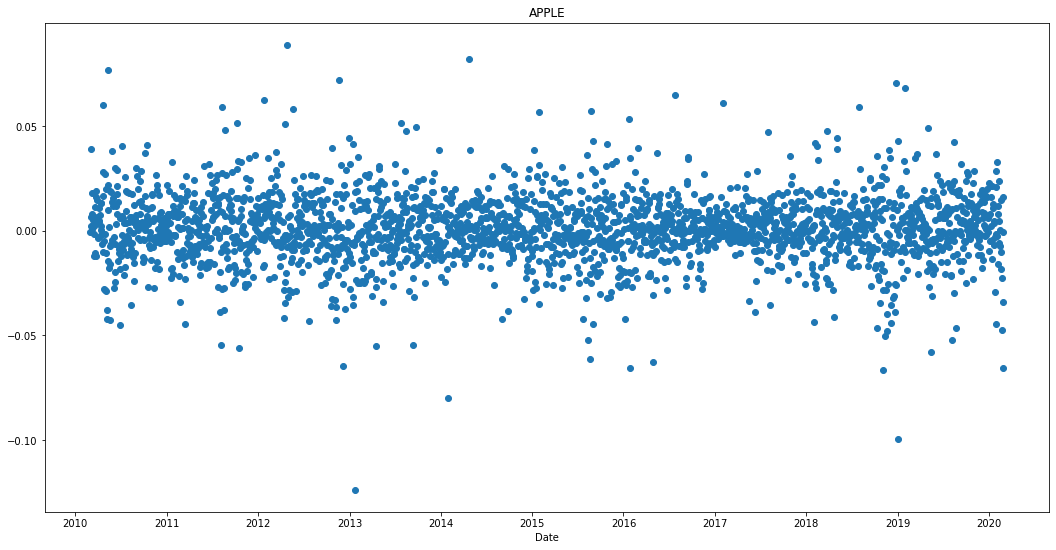

In [61]:
#Use pct_change to find the percent change for each day

plt.figure(figsize=(18,9))
data['Daily Return'] = data['Close'].pct_change()
plt.plot(data['Date'], data['Daily Return'], 'o')
plt.xlabel('Date')
plt.ylabel(None)
plt.title('APPLE')

Text(0.5, 1.0, 'APPLE')

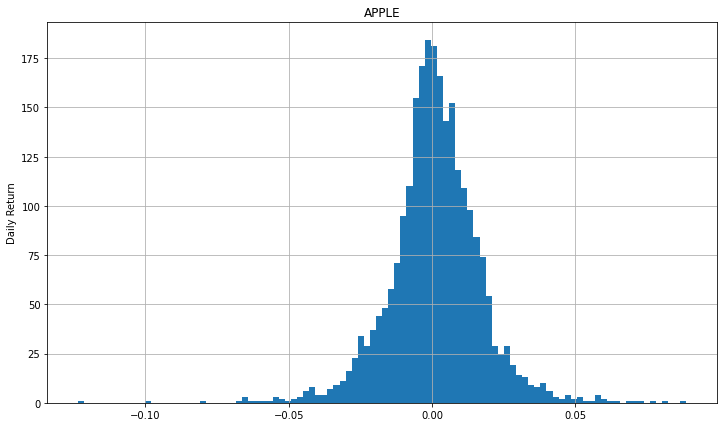

In [62]:
#using histogram to see overall look at the average daily return
plt.figure(figsize=(12, 7))
data['Daily Return'].hist(bins=100)
plt.ylabel('Daily Return')
plt.title('APPLE')

# **Long Short-term Memory**

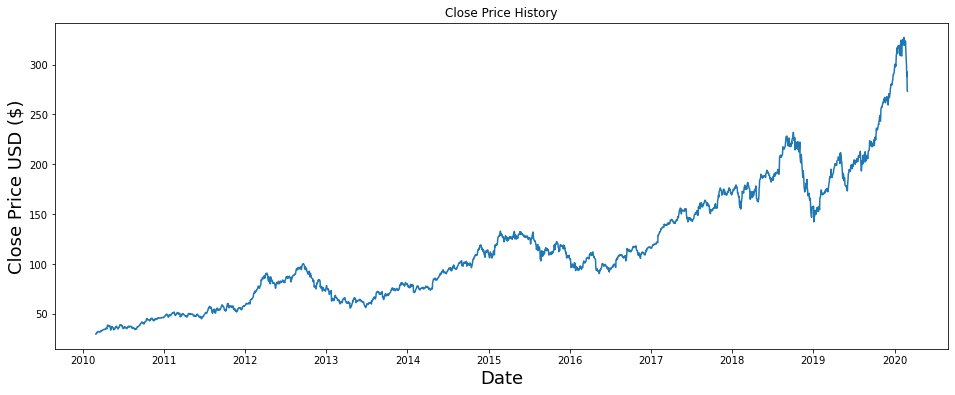

In [63]:
plt.figure(figsize=(16,6))
plt.title('Close Price History')
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [64]:
#create a new dataframe with only Close column
close_value = data.filter(['Close'])
#convert data frame to numpy array
dataset = close_value.values
#find the number of rows to train the model on
training_data_len = int(np.ceil(len(close_value) * .95))  #train 95%

training_data_len

2393

In [65]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(close_value)

scaled_data

array([[6.72575693e-05],
       [0.00000000e+00],
       [2.30693463e-04],
       ...,
       [8.83812549e-01],
       [8.19480684e-01],
       [8.18942624e-01]])

In [66]:
#create the training data set
#create the scaled training data set
data_train = scaled_data[0:int(training_data_len),:]
#split data into x_train and y_train data set
x_train = []
y_train = []

for i in range(60, len(data_train)): #predict based on previous 60 days
  x_train.append(data_train[i-60:i, 0])
  y_train.append(data_train[i, 0])
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

#convert x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

#reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

[array([6.72575693e-05, 0.00000000e+00, 2.30693463e-04, 8.93516807e-04,
       4.85229733e-03, 4.91451059e-03, 6.80747487e-03, 7.68182327e-03,
       7.99894271e-03, 8.52725092e-03, 7.20126794e-03, 7.49451094e-03,
       7.33578308e-03, 7.59035298e-03, 6.43755824e-03, 7.63844214e-03,
       9.37267856e-03, 9.85794193e-03, 8.55146364e-03, 1.05930672e-02,
       1.13090240e-02, 1.29686045e-02, 1.25627051e-02, 1.30288000e-02,
       1.42394363e-02, 1.47438680e-02, 1.52530078e-02, 1.49409327e-02,
       1.58246972e-02, 1.60648067e-02, 1.61320643e-02, 1.76984931e-02,
       1.92501252e-02, 1.85197080e-02, 1.83613164e-02, 1.71698486e-02,
       2.41982646e-02, 2.76811978e-02, 2.97759348e-02, 2.91369879e-02,
       2.55531683e-02, 2.53416432e-02, 2.87236901e-02, 2.50968257e-02,
       2.76236926e-02, 2.39389866e-02, 2.26442784e-02, 1.79675233e-02,
       1.29760028e-02, 2.16858581e-02, 2.29012023e-02, 2.55770447e-02,
       2.37853031e-02, 2.16041401e-02, 2.17961605e-02, 2.09026437e-02,
     

In [67]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

#build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

#compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

#train the model
model.fit(x_train, y_train, batch_size=16, epochs=10)

Epoch 1/10
146/146 [==============================] - 16s 85ms/step - loss: 0.0024
Epoch 2/10
146/146 [==============================] - 13s 86ms/step - loss: 1.9815e-04
Epoch 3/10
146/146 [==============================] - 12s 85ms/step - loss: 1.8592e-04
Epoch 4/10
146/146 [==============================] - 12s 85ms/step - loss: 1.8857e-04
Epoch 5/10
146/146 [==============================] - 12s 84ms/step - loss: 1.6448e-04
Epoch 6/10
146/146 [==============================] - 12s 84ms/step - loss: 1.5924e-04
Epoch 7/10
146/146 [==============================] - 14s 94ms/step - loss: 1.5565e-04
Epoch 8/10
146/146 [==============================] - 13s 89ms/step - loss: 1.5762e-04
Epoch 9/10
146/146 [==============================] - 12s 85ms/step - loss: 1.5110e-04
Epoch 10/10
146/146 [==============================] - 12s 85ms/step - loss: 1.2506e-04


In [68]:
#create the testing data set
#create a new array containing scaled values 
test_data = scaled_data[training_data_len - 60: , :]
#create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
predictions = []

x_test.append(test_data[0:60, 0])
for i in range(60, len(test_data)):
  x_test_np = np.array([x_test[-1]])
  x_test_np = np.reshape(x_test_np, (x_test_np.shape[0], x_test_np.shape[1], 1))

  prediction = model.predict(x_test_np)[0]
  predictions.append(prediction)

  temp = np.append(x_test[-1][1:], prediction)
  x_test = np.concatenate((x_test, np.array([temp])))

predictions = scaler.inverse_transform(predictions)

#evaluate model via MSE
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

33.60118708807999

In [69]:
#evaluate model via MAPEMAPE
mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100
mape

9.254573743623478

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


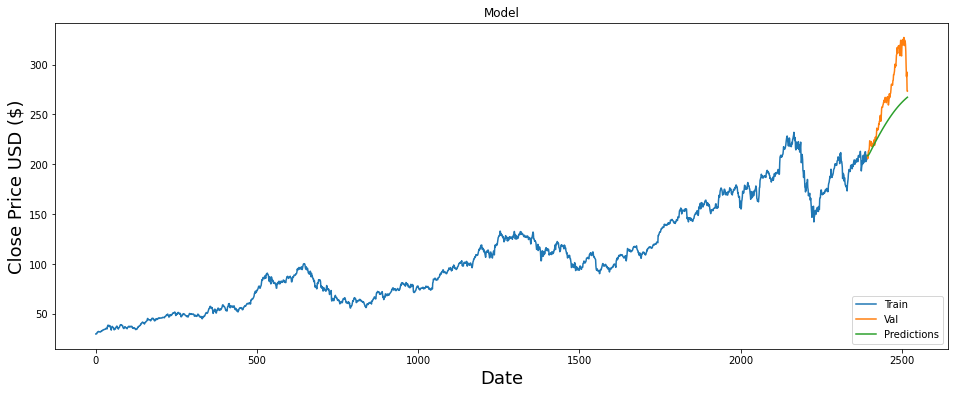

In [70]:
#plot the data
train = close_value[:training_data_len]
valid = close_value[training_data_len:]
valid['Predictions'] = predictions
#visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [71]:
valid

,Close,Predictions
2393,208.74,208.606859
2394,205.70,208.557408
2395,209.19,208.769975
2396,213.28,209.139438
2397,213.26,209.602911
...,...,...
2513,298.18,266.152482
2514,288.08,266.435415
2515,292.65,266.714874
2516,273.52,266.990717
